<a href="https://colab.research.google.com/github/sharvaree1921/Audio_Controlled_Drone/blob/main/Audio_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
audio_data = "gdrive/My Drive/Audio_Controlled_Drone/1083.wav"

In [5]:
x, sr = librosa.load(audio_data)

In [6]:
librosa.load(audio_data, sr=44100)

(array([-0.250885  , -0.261734  , -0.25909424, ..., -0.11329651,
        -0.11074829, -0.10441589], dtype=float32), 44100)

In [7]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [8]:
import IPython.display as ipd
ipd.Audio(audio_data)

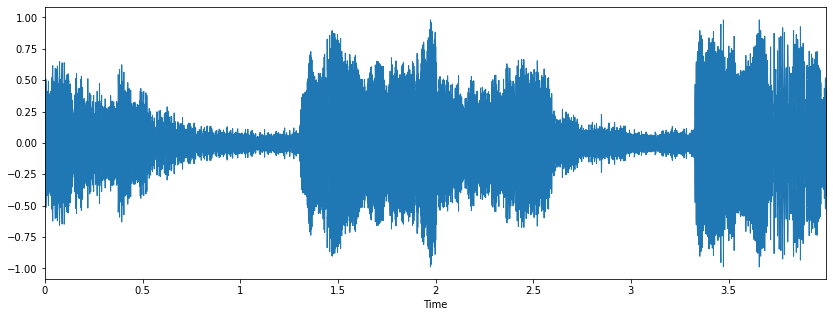

In [9]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

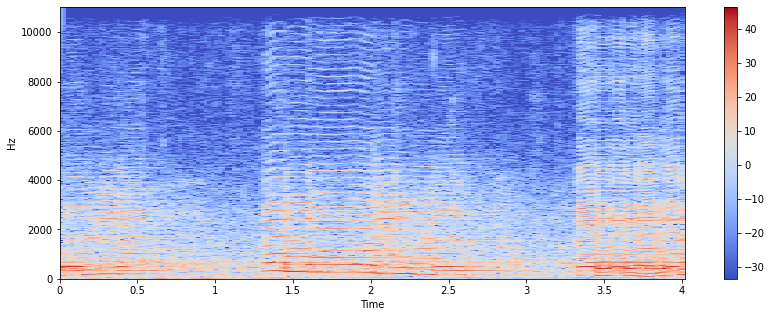

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

In [21]:
# Creating an Audio Signal

sr = 22050 #sample rate
T = 5.0 #seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)  #time variable
x = 0.5*np.sin(2*np.pi*220*t)  #pure sine wave at 220Hz
#Playing the audio
ipd.Audio(x, rate = sr) #load the numpy array
# saving the audio
#librosa.output.write_wav('tone_220.wav', x, sr)

(216,)


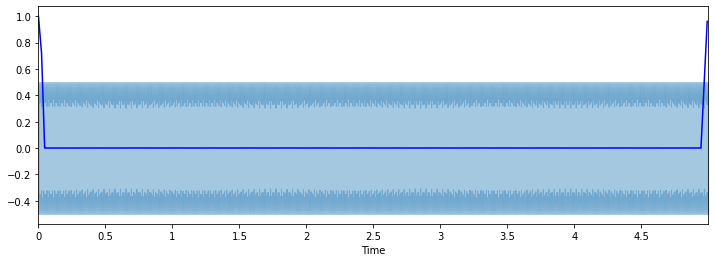

In [23]:
# Plotting spectral_centroids
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)#(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# normalizing spectral centroid for visualization
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the spectral centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [24]:
# For Rest other features refer: https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html